In [1]:
import mlc_func as mlcf
import numpy as np
import pandas as pd
import keras
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [4]:
mlcf.elf.utils.change_alignment(path='../data/PBE/sz/basis_old_nn.json_processed/trimers_processed.hdf5',
                                traj_path='../data/PBE/sz/trimers.traj',
                                new_method='water', 
                                save_as ='../data/PBE/sz/basis_old_water.json_processed/trimers_processed.hdf5')

{'r_o_o': 1.0, 'r_i_o': 0.05, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'nn'}


In [5]:
def create_target_file(baseline, reference, output, offset = 0):
    targets = np.genfromtxt(reference, delimiter = ',') -\
        np.genfromtxt(baseline, delimiter = ',') - offset
#     species = np.array(['o','h','h']*int(len(targets)/3)).reshape(-1,1)
#     targets = np.concatenate([targets,species], axis = 1)
    pd.DataFrame(targets).to_csv(output, index = None, header = None)

In [22]:
basepath_feat = '../data/PBE/sz/basis_old_water.json_processed/'
basepath_tar = '../data/PBE/sz/'
revpath_tar = '../data/BH/dz_custom/'

# basepath_feat = '../data/PBE/sz/basis_old_water.json_processed/'
# basepath_tar = '../data/PBE/sz'
# revpath_tar = '../data/BH/dz_custom_padded/'

systems = ['monomers','dimers','trimers']
# systems = ['16p16']
mono_offset = 0
n_mol = [3,2,1]
# filters = [([True,True] + [False]*10)*3000]

for s,nm in zip(systems, n_mol):
    create_target_file(basepath_tar +'/{}.forces'.format(s),
                      revpath_tar + '/{}.forces'.format(s),
                      basepath_tar +'/{}_targets.forces'.format(s), mono_offset*nm)
        
feature_src = [basepath_feat + s +'_processed.hdf5' for s in systems]
# feature_src = [basepath_feat + s +'.M' for s in systems]
target_src = [basepath_tar +'/' + s +'_targets.forces' for s in systems]
traj_src = [basepath_tar +'/' + s +'.traj' for s in systems]
# filters = np.genfromtxt('../data/BH/dz_custom_padded/filter.idx', dtype =bool)
# filters = np.array([filters, filters]).T.flatten()
nn = mlcf.ml.build_force_mlcf(feature_src, target_src,
                                 traj_src, filters =[], automask_std = 1e-3,
                                  autofilt_percent = 0.005, species = 'h')


{'r_o_o': 1.0, 'r_i_o': 0.05, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'water'}
(1564, 8)
{'r_o_o': 1.0, 'r_i_o': 0.05, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'water'}
(8000, 8)
{'r_o_o': 1.0, 'r_i_o': 0.05, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'water'}
(9000, 8)


In [23]:
old_scaler = nn.scaler

In [67]:
nn.load_all('../../elf_models/mlcf_master/16p16/pbedz_mbp_elf/')

/home/sebastian/miniconda3/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [68]:
nn.X_test = nn.scaler.transform(old_scaler.inverse_transform(nn.X_test))
nn.X_train = nn.scaler.transform(old_scaler.inverse_transform(nn.X_train))
nn.X_valid = nn.scaler.transform(old_scaler.inverse_transform(nn.X_valid))

ValueError: operands could not be broadcast together with shapes (1229,5) (6,) (1229,5) 

In [60]:
# nn.model = keras.models.load_model('../../elf_models/mlcf_master/16p16/pbesz_mbp_long/force_o')

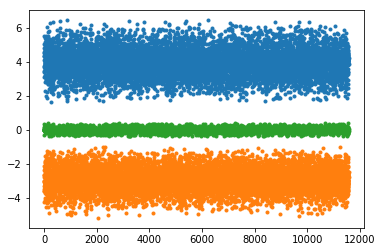

In [24]:
plot(nn.y_train,ls = '', marker = '.')


In [25]:
# learning_curve = nn.learning_curve(steps=8)

In [26]:
nn.nodes_per_layer = 8

In [27]:
nn.train(early_stopping=True, b=1e-8,batch_size=500, restart = False)

--------Epoch = 0----------
Training loss || Validation loss
     3.551230 ||      3.550740
--------Epoch = 500----------
Training loss || Validation loss
     0.106814 ||      0.105427
--------Epoch = 1000----------
Training loss || Validation loss
     0.095499 ||      0.093217
--------Epoch = 1500----------
Training loss || Validation loss
     0.090868 ||      0.088238
--------Epoch = 2000----------
Training loss || Validation loss
     0.088182 ||      0.084954
--------Epoch = 2500----------
Training loss || Validation loss
     0.087003 ||      0.083028
--------Epoch = 3000----------
Training loss || Validation loss
     0.085267 ||      0.081501
--------Epoch = 3500----------
Training loss || Validation loss
     0.083789 ||      0.080000


======== Evaluation on test set =============
              RMSE =  0.0832
              MAE = 0.0511
              Max. abs. error = 2.0334


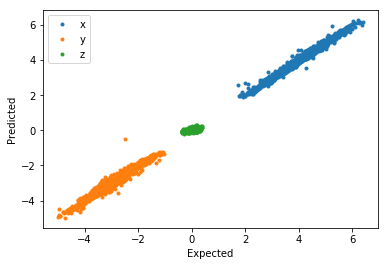

{'rmse': 0.08317471470757536,
 'mae': 0.051064440347585935,
 'max': 2.0334112906040174}

In [28]:
nn.evaluate(plot=True, on='test')

======== Evaluation on test set =============
              RMSE =  0.1582
              MAE = 0.1034
              Max. abs. error = 1.8669


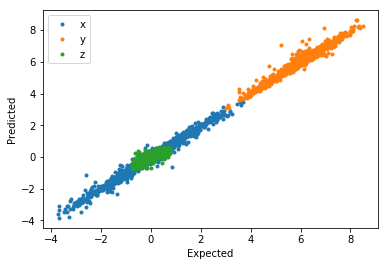

{'rmse': 0.1581992384848876,
 'mae': 0.1033829763716674,
 'max': 1.8669248517879353}

In [13]:
nn.evaluate(plot=True, on='test')

In [29]:
nn.save_all('../../elf_models/mlcf_master/water/pbesz_to_bhdz_mb', override=True)

In [54]:
ensemble = mlcf.ml.Ensemble_Network(nn)

In [57]:
ensemble.train_next()

Training model: 2
--------Epoch = 0----------
Training loss || Validation loss
     0.690111 ||      0.689123
--------Epoch = 500----------
Training loss || Validation loss
     0.050323 ||      0.049841
--------Epoch = 1000----------
Training loss || Validation loss
     0.048252 ||      0.048288
--------Epoch = 1500----------
Training loss || Validation loss
     0.047829 ||      0.048089
--------Epoch = 2000----------
Training loss || Validation loss
     0.047680 ||      0.048073


KeyboardInterrupt: 

In [67]:
np.std(ensemble.std_predict(nn.X_test, processed=True), axis = 0)

array([0.00567823, 0.00177418, 0.00192366], dtype=float32)